# OrionKL test with method 1

In [1]:
%matplotlib inline

import os
import sys
import copy
import numpy as np

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v1 import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 13})

#from pycupid import *

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-v1/figures/"

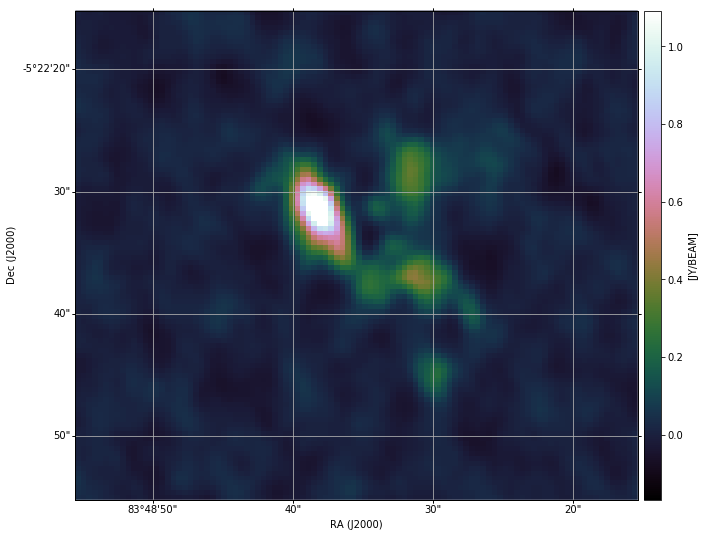

In [2]:
fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
#fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

data, wcs, hdu = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"])

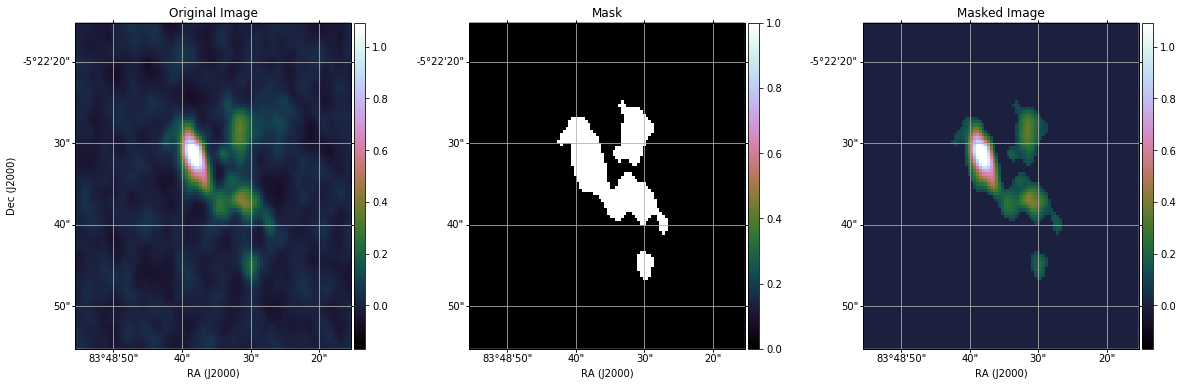

back_level:  0.10237737624469602


In [3]:
preprocessing(data, wcs)

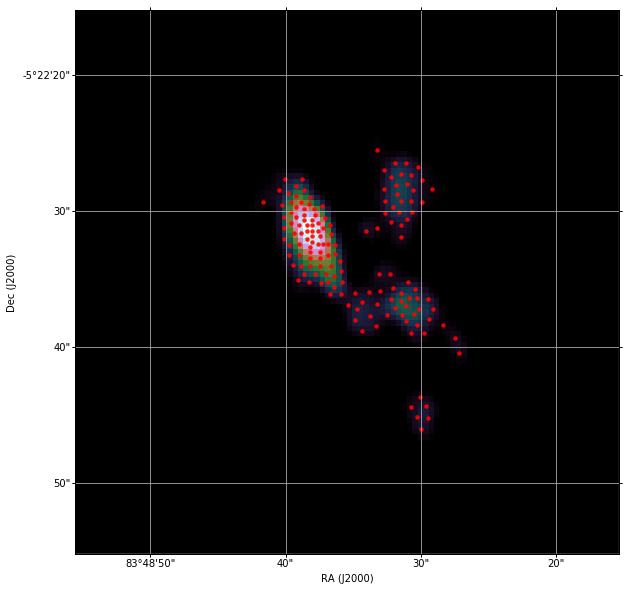

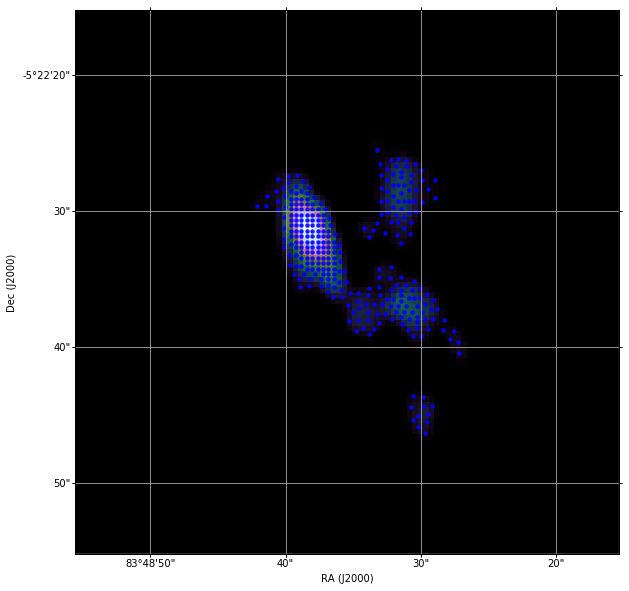

In [4]:
hdmc = HDMClouds(data, back_level=0.089, wcs=wcs, verbose=True, n_center=150)

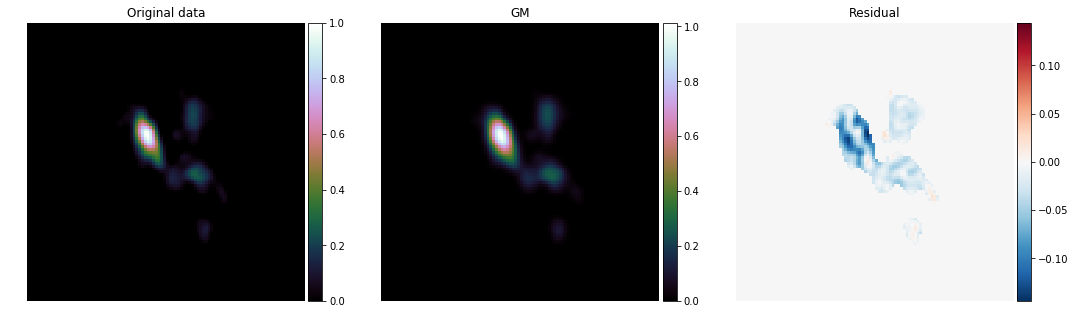

RESIDUAL STATS
RMS of residual: 0.012075973623253338
Inf norm of residual: 0.1440983454137041
Variance of residual: 0.00014000832850700264
Normalized flux addition: 0.2189002169148009
Normalized flux lost: 0.0032470223424081505


In [5]:
hdmc.get_residual_stats();

In [6]:
%%prun -s tottime -q -l 30 -T hdmc_m1_prof
hdmc.build_gmr()

 
*** Profile printout saved to text file 'hdmc_m1_prof'. 


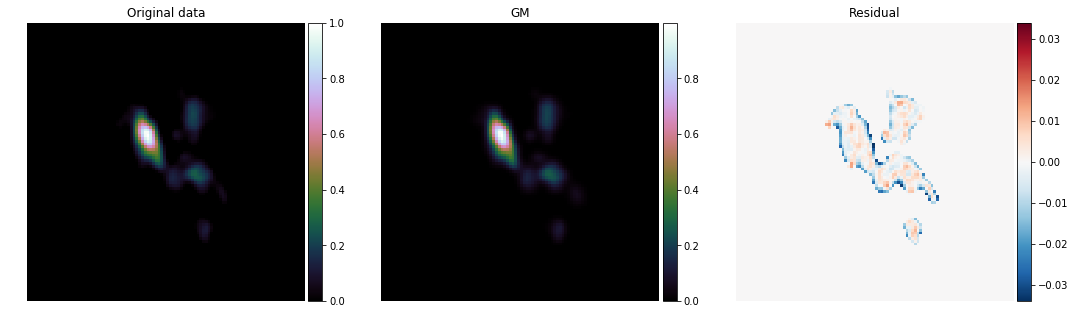

RESIDUAL STATS
RMS of residual: 0.0024072891189627793
Inf norm of residual: 0.033852295006227676
Variance of residual: 5.760381942331392e-06
Normalized flux addition: 0.028603085344741052
Normalized flux lost: 0.011962372332685057


In [7]:
hdmc.get_residual_stats();

In [8]:
hdmc.solver_output()

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 60200.
nfev: 60241
xtol: 1e-07
ftol: 1e-07


In [9]:
print("Elapsed time {0}".format(hdmc.elapsed_time))

Elapsed time 21.269200325012207


In [10]:
w,sig = hdmc.get_params_mapped()

print("PARAMETERS VARIATION:")
print("w variation: ",np.max(np.abs(hdmc.w0-w)))
print("sig variation: ",np.max(np.abs(hdmc.sig0-sig)))

PARAMETERS VARIATION:
w variation:  0.133364758571013
sig variation:  0.009859685951185016


#### Profiling results

In [11]:
print(open('hdmc_m1_prof', 'r').read())

         4282066 function calls (4279854 primitive calls) in 21.269 seconds

   Ordered by: internal time
   List reduced from 152 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    60243    6.794    0.000    6.794    0.000 {fgm_eval.gm_eval_trunc_thread}
        1    4.719    4.719   21.264   21.264 {built-in method scipy.optimize._minpack._lmdif}
   180729    2.466    0.000    4.894    0.000 necompiler.py:750(evaluate)
    60243    1.608    0.000    3.072    0.000 hdmclouds_v1.py:35(d1psi1)
    60243    1.288    0.000    1.288    0.000 utils.py:139(sig_mapping)
    60243    0.991    0.000   16.549    0.000 hdmclouds_v1.py:356(F)
    60243    0.677    0.000    0.677    0.000 {fgm_eval.gm_eval}
   180729    0.627    0.000    1.038    0.000 necompiler.py:725(getArguments)
   180732    0.565    0.000    0.752    0.000 necompiler.py:534(getContext)
   361468    0.216    0.000    0.216    0.000 {built-in method numpy.core.multiarray.a

***
#### Second try increasing `n_center`

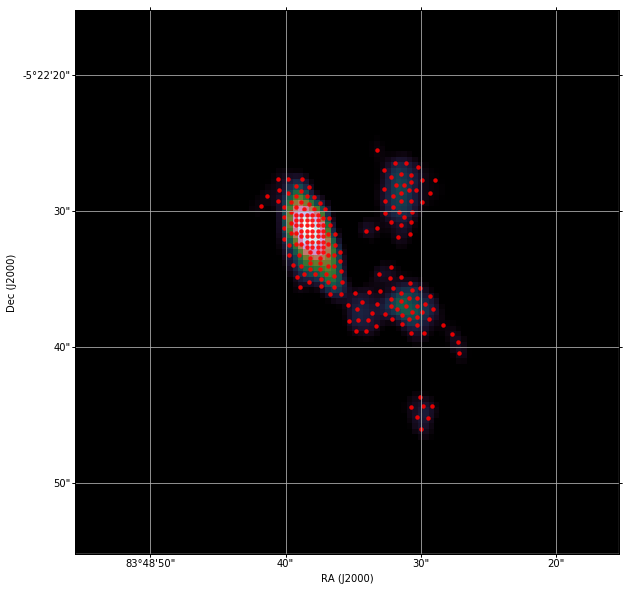

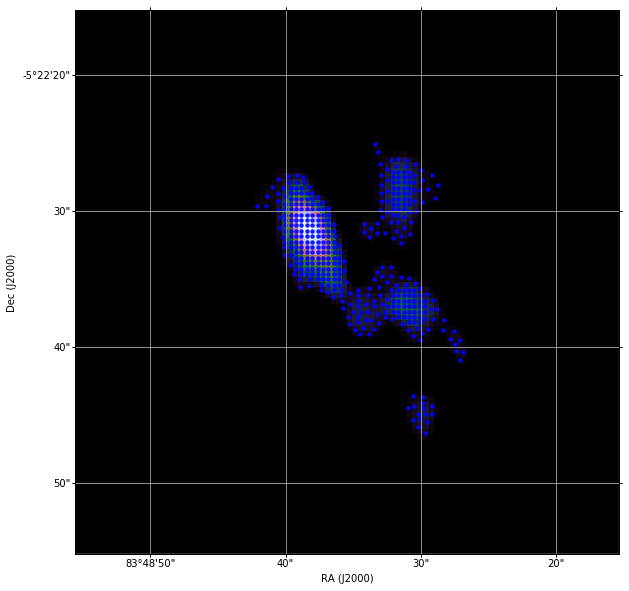

In [12]:
hdmc = HDMClouds(data, back_level=0.089, wcs=wcs, verbose=True, n_center=200)
hdmc.build_gmr()

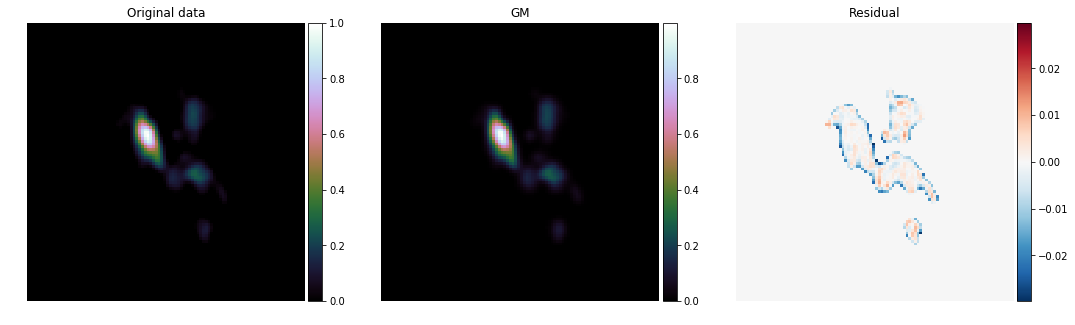

RESIDUAL STATS
RMS of residual: 0.0019817893718490067
Inf norm of residual: 0.0297721547834642
Variance of residual: 3.899148681581273e-06
Normalized flux addition: 0.02363046670332429
Normalized flux lost: 0.008582860860883577


In [13]:
hdmc.get_residual_stats();

In [14]:
hdmc.solver_output()

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80200.
nfev: 80240
xtol: 1e-07
ftol: 1e-07


In [16]:
print("Elapsed time {0}".format(hdmc.elapsed_time))

Elapsed time 38.266119718551636
